In [68]:
# Importing libraries
import pandas as pd
import numpy as np
import pickle as pkl
import streamlit as st
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer


## Data and Domain knowledge

The dataset that is used in this project is from kaggle, it is bout the prediction of heart failure or heart disease using the attributes that contains the dataset for example maximum heart rate that can lead to heart failure or heart disease

In [69]:
# Loading the dataset
data = pd.read_csv('D:\HeartRate\heart_statlog_cleveland_hungary_final.csv')

## Preview of dataset

In [70]:
#view the first 10 rows of the dataset
data.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


### Explanation of columns/ Domain Knowledge

In [71]:
# checking column names
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

This heart disease dataset is a commonly used dataset for predicting heart failure or heart problems of the patient's hearts in the hospitals. It contains information about the patient's sysptoms that can predict the heart disease. The dataset includes the following attributes:

Age: The age of the individual.

Sex: Gender of the individual (0 = female, 1 = male).

Chest Pain Type: The type of chest pain experienced by the individual. This is categorized into different levels (1, 2, 3, 4).

Resting Blood Pressure (Resting BP S): The individual's resting blood pressure in mm Hg.

Cholesterol: Serum cholesterol level in mg/dl.

Fasting Blood Sugar (Fasting Blood Sugar): Fasting blood sugar levels > 120 mg/dl (1 = true, 0 = false).

Resting ECG (Resting Electrocardiographic Results): Results of resting electrocardiogram.

Max Heart Rate: Maximum heart rate achieved.

Exercise Angina: Angina induced by exercise (1 = yes, 0 = no).

Oldpeak: ST depression induced by exercise relative to rest.

ST Slope: The slope of the peak exercise ST segment.

Target: The presence of heart disease (1 = yes, 0 = no).

In [72]:
# checking the shape of the dataset
rows, columns = data.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 1190 rows and 12 columns


In [73]:
# checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [74]:
#checking for data types
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

All the variables are in the correct data types

### Checking for null values

In [75]:
# checking for null values
data.isnull().sum().sum()

0

### Duplicates

In [76]:
# checking duplicates
data.duplicated().any()

True

In [77]:
# removing of duplicates
data.drop_duplicates(inplace=True)

In [78]:
# checking duplicates
data.duplicated().any()

False

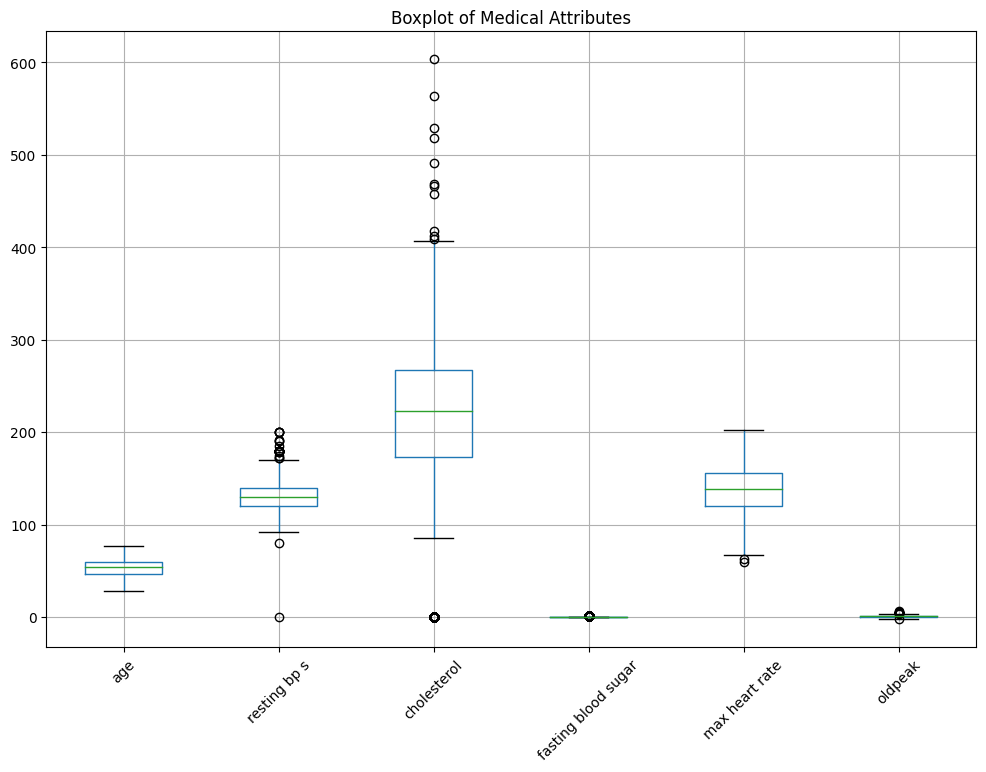

In [79]:
#Outliers

# Define columns to plot
columns_to_plot = ['age', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'oldpeak']

# Create a boxplot for each column
plt.figure(figsize=(12, 8))
data[columns_to_plot].boxplot()
plt.title('Boxplot of Medical Attributes')
plt.xticks(rotation=45)
plt.show()


## Summary Statistics

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


Age

The youngest age observed in the dataset is 28 years while the oldest is 77 years

Sex

The minimum value of 0 represents female sex in this dataset while the maximum value is 1 and represent male sex.

Chest Pain Type

The minimum value of 1 represents typical angina chest pain while maximum value of 4 represents asymptomatic chest pain .

Resting Blood Pressure (resting bp s)

There seems to be an anomaly here since resting blood pressure cannot be 0. It might indicate missing or erroneous data.
The maximum observed resting blood pressure is 200 mmHg.

Cholesterol:

Min: 0
The minimum observed value for "cholesterol" indicates a potential issue with the data since cholesterol levels cannot realistically be 0. This may suggest missing or erroneous data that requires verification.

Max: 603
The maximum observed value for "cholesterol" is 603, indicating the highest cholesterol level recorded in the dataset. This value might be considered very high and may indicate potential health concerns.

Fasting Blood Sugar (fasting blood sugar):

Min: 0
The minimum value in the "fasting blood sugar" column indicates the lowest level of fasting blood sugar recorded in the dataset.

Max: 1
The maximum value in the "fasting blood sugar" column indicates the highest level of fasting blood sugar recorded in the dataset, typically represented as a binary indicator (0 or 1) for normal and elevated blood sugar levels, respectively.

Resting ECG (resting ecg):

Min: 0
The minimum value in the "resting ECG" column corresponds to the least abnormal resting electrocardiographic result recorded in the dataset.

Max: 2
The maximum value in the "resting ECG" column corresponds to the most abnormal resting electrocardiographic result recorded in the dataset.

Max Heart Rate (max heart rate):

Min: 60
The minimum observed value for "max heart rate" is 60, indicating the lowest recorded heart rate in the dataset.

Max: 202
The maximum observed value for "max heart rate" is 202, indicating the highest recorded heart rate in the dataset.

Exercise Angina (exercise angina):

Min: 0
The minimum value in the "exercise angina" column indicates the absence of exercise-induced angina.

Max: 1
The maximum value in the "exercise angina" column indicates the presence of exercise-induced angina.

Oldpeak:

Min: -2.6
The minimum observed value for "oldpeak" indicates the lowest ST depression induced by exercise relative to rest recorded in the dataset.

Max: 6.2
The maximum observed value for "oldpeak" indicates the highest ST depression induced by exercise relative to rest recorded in the dataset.

ST Slope (ST slope):

Min: 0
The minimum value in the "ST slope" column corresponds to the flattest slope of the ST segment during exercise, indicating less favorable cardiac health.

Max: 3
The maximum value in the "ST slope" column corresponds to the steepest slope of the ST segment during exercise, suggesting better cardiac health.

Target:

Min: 0
The minimum value in the "target" column indicates absence of heart disease as the target condition.

Max: 1
The maximum value in the "target" column indicates presence of heart disease as the target condition.

## visualization

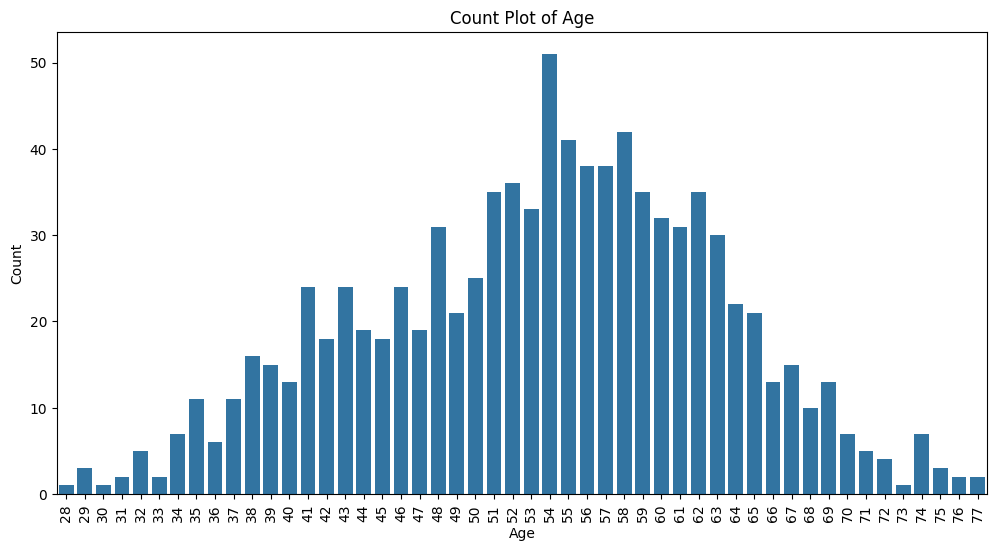

In [81]:
# plotting age against count

# Count plot for age variable
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=data)
plt.title('Count Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()


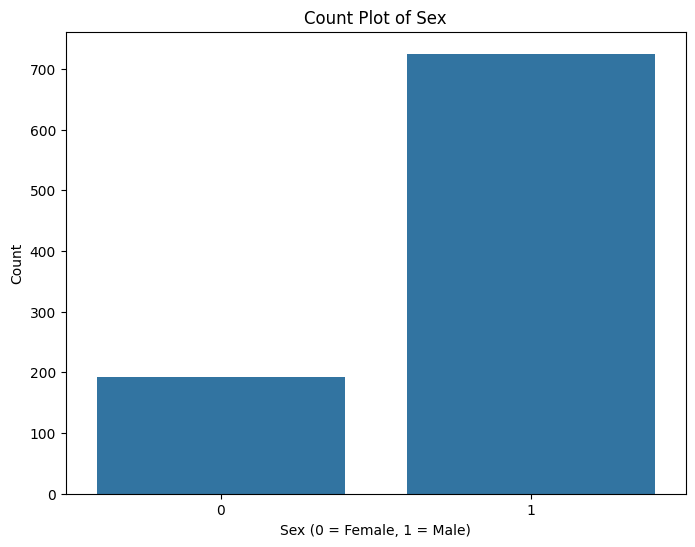

In [82]:
# plotting sex against count

# Count plot for sex variable
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Count Plot of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()




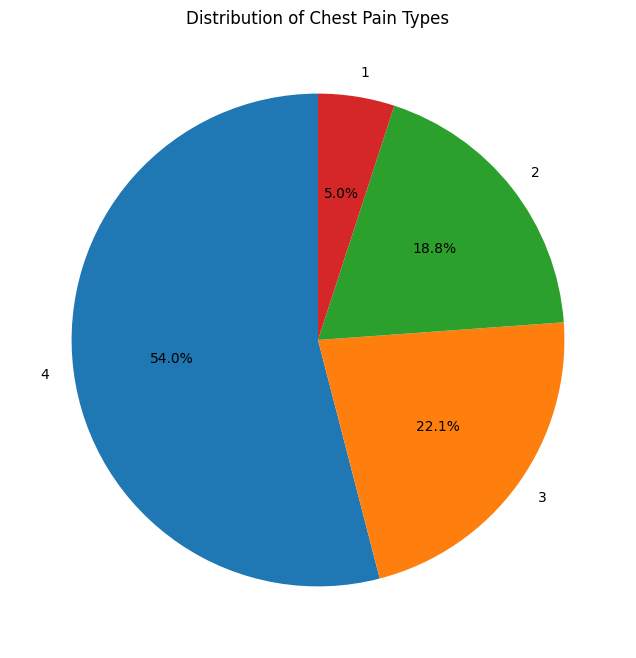

In [83]:
# pie chart for chest pain distribution

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Pie chart for chest pain type variable
chest_pain_counts = data['chest pain type'].value_counts()
ax.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Chest Pain Types')

plt.show()


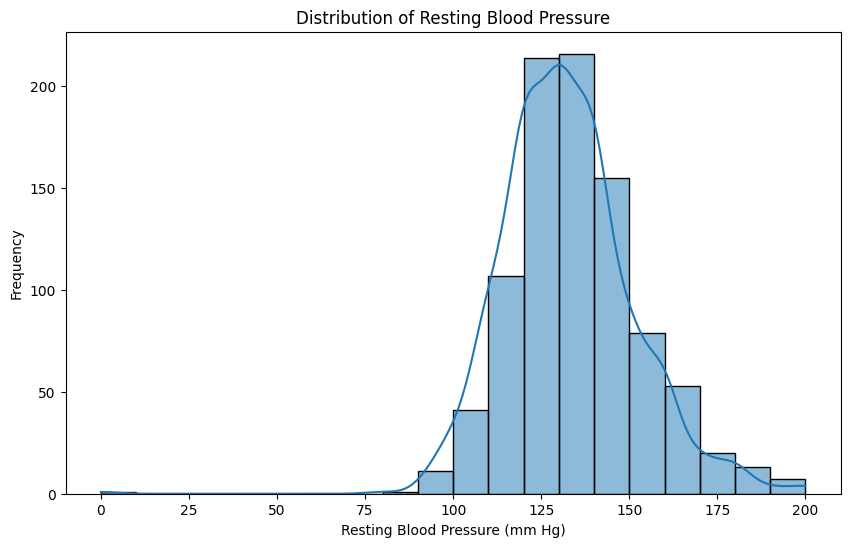

In [84]:
# distribution of resting blood pressure using histogram

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for resting blood pressure
sns.histplot(data['resting bp s'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

plt.show()


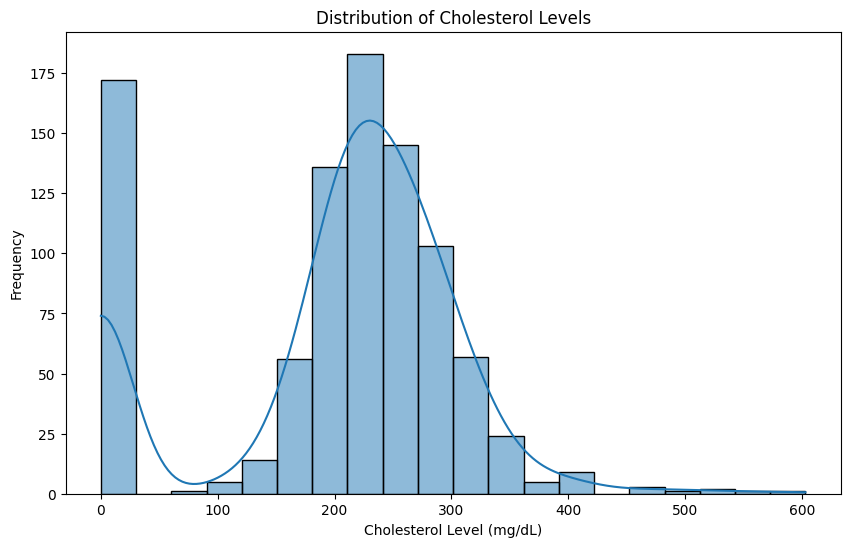

In [85]:
# distribution of cholesterol levels using histogram

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for cholesterol
sns.histplot(data['cholesterol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Frequency')

plt.show()


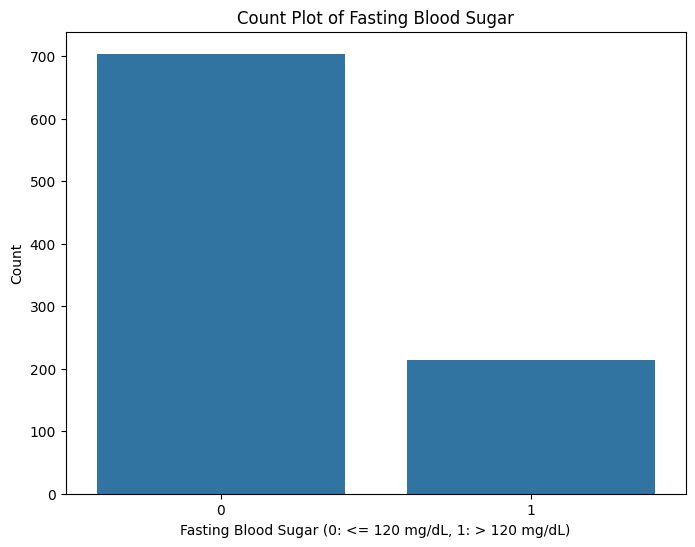

In [86]:
# count plot of fasting blood sugar

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for fasting blood sugar
sns.countplot(x='fasting blood sugar', data=data)
plt.title('Count Plot of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (0: <= 120 mg/dL, 1: > 120 mg/dL)')
plt.ylabel('Count')

plt.show()


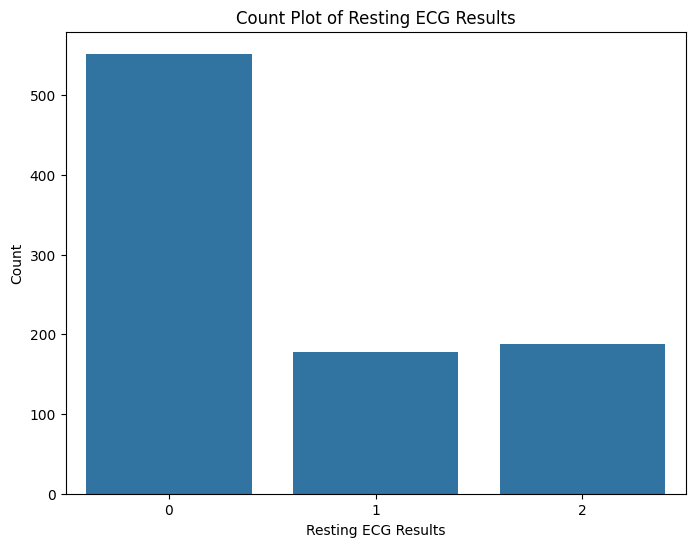

In [87]:
# count plot of resting ECG result

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for resting ecg
sns.countplot(x='resting ecg', data=data)
plt.title('Count Plot of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')

plt.show()


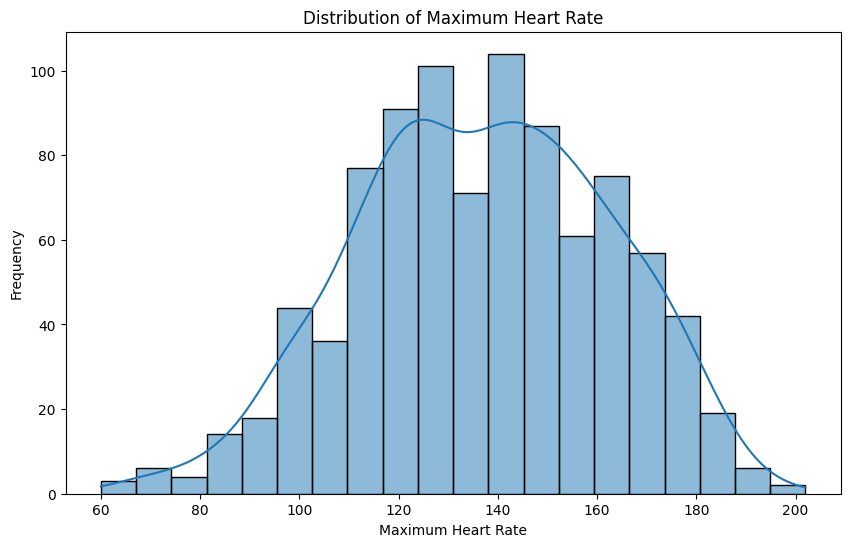

In [88]:
# distribution of maximum heart rate

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for maximum heart rate
sns.histplot(data['max heart rate'], bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')

plt.show()



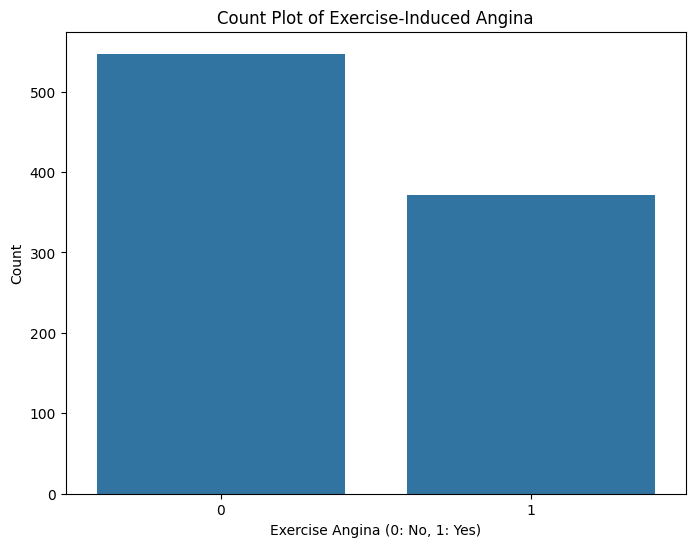

In [89]:
# count plot for exercise-inducted angina

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for exercise angina
sns.countplot(x='exercise angina', data=data)
plt.title('Count Plot of Exercise-Induced Angina')
plt.xlabel('Exercise Angina (0: No, 1: Yes)')
plt.ylabel('Count')

plt.show()


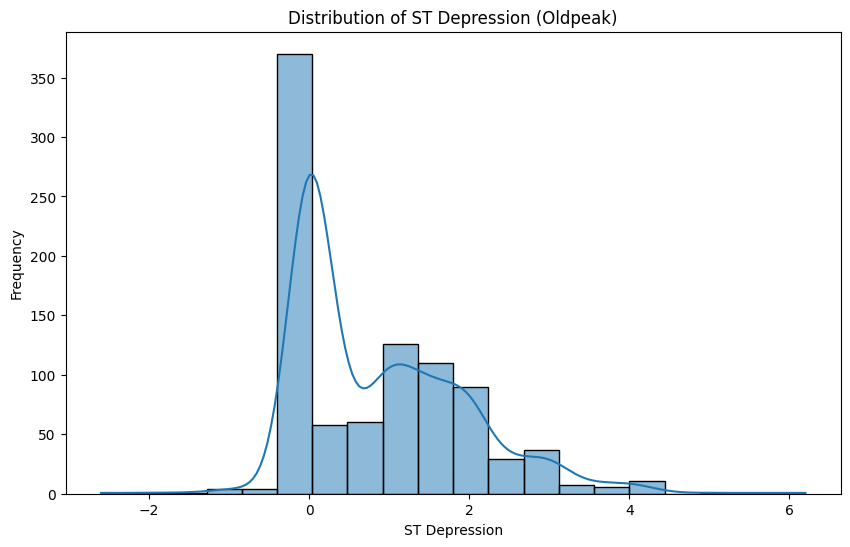

In [90]:
# distribution of ST depression(oldpeak)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Histogram for oldpeak
sns.histplot(data['oldpeak'], bins=20, kde=True)
plt.title('Distribution of ST Depression (Oldpeak)')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')

plt.show()


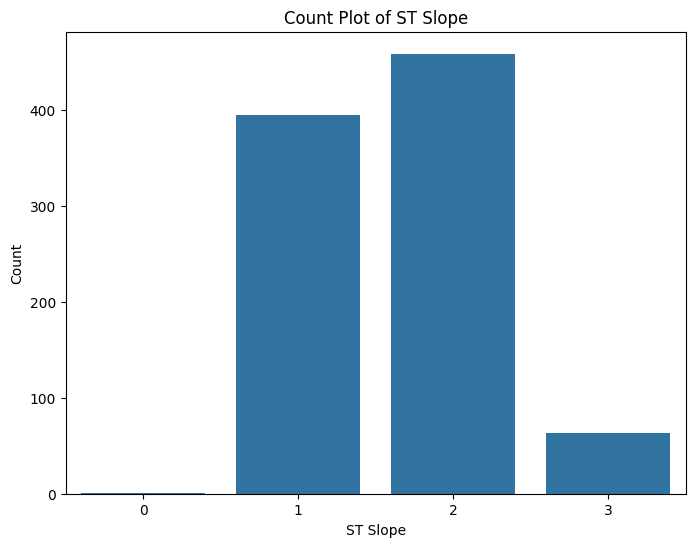

In [91]:
# count plot of ST slope

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for ST slope
sns.countplot(x='ST slope', data=data)
plt.title('Count Plot of ST Slope')
plt.xlabel('ST Slope')
plt.ylabel('Count')

plt.show()


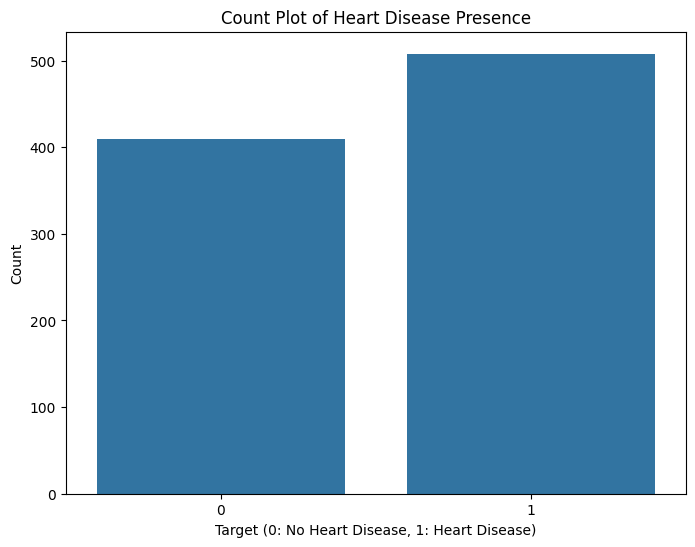

In [92]:
# count plot of Heart Disease Presence

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Count plot for target
sns.countplot(x='target', data=data)
plt.title('Count Plot of Heart Disease Presence')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')

plt.show()


### Training and Testing the models

In [93]:
# logistic regression model for predicting heart disease presence


# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[68  9]
 [19 88]]


In [94]:
# decision tree classifier for predicting heart disease presence

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8260869565217391

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        77
           1       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184


Confusion Matrix:
[[67 10]
 [22 85]]


In [95]:
# K-Nearest Neighbors (KNN) classifier for predicting heart disease presence

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7065217391304348

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184


Confusion Matrix:
[[55 22]
 [32 75]]


In [96]:
#Support Vector Machine (SVM) classifier for predicting heart disease presence

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[68  9]
 [19 88]]


In [97]:
# Random Forest classifier for predicting heart disease presence

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8804347826086957

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Confusion Matrix:
[[67 10]
 [12 95]]


### About the final model chosen (Random Forest Classifier)

Random Forest classifier achieved an accuracy of approximately 88.04% on the test data.

here is the break down the evaluation metrics further:

Classification Report:


Precision for class 0 (no heart disease) is 85%, meaning when it predicts no heart disease, it's correct 85% of the time.

Precision for class 1 (heart disease) is 90%, indicating that when it predicts heart disease, it's correct 90% of the time.


Recall for class 0 is 87%, meaning it correctly identifies 87% of the instances of no heart disease.

Recall for class 1 is 89%, indicating it correctly identifies 89% of the instances of heart disease.

F1-score for class 0 is 0.86.

F1-score for class 1 is 0.90.

Support: The number of actual occurrences of the class in the specified dataset

Some of the strengths of Random Forest Classifier

The Random Forest classifier offers several strengths, making it a popular choice for various classification tasks:

 **High Accuracy**: Random Forests generally have high accuracy compared to other algorithms. By combining multiple decision trees and averaging their predictions, Random Forests reduce overfitting and improve generalization.

**Robust to Overfitting**: Random Forests are less prone to overfitting than other algorithms. The randomness introduced during training, such as bootstrap sampling and feature selection, helps prevent the model from memorizing the training data.

**Handles Large Datasets**: Random Forests can efficiently handle large datasets with many features and observations. The algorithm's parallel processing capabilities allow it to scale well with increasing data size.

**Feature Importance**: Random Forests provide a measure of feature importance, indicating which features are most influential in making predictions. This information is valuable for feature selection and understanding the underlying patterns in the data.

**Handles Missing Values**: Random Forests can handle missing values in the dataset. During training, the algorithm uses the available features to make decisions without requiring imputation of missing values.

While Random Forest classifiers offer many advantages, they also have some limitations and weaknesses to consider:

**Complexity and Interpretability**: Random Forests consist of multiple decision trees, which can make the model complex and challenging to interpret compared to simpler models like logistic regression. Understanding the relationship between features and predictions may be less straightforward.

**Computational Resource Intensive**: Training a Random Forest model can be computationally expensive, especially with a large number of trees and features. While Random Forests can be parallelized for efficiency, they may still require significant computational resources and time for training, particularly on large datasets.

**Memory Consumption**: Random Forests store multiple decision trees in memory, which can lead to high memory consumption, especially when dealing with large datasets or models with many trees. This can be a limitation in memory-constrained environments.

**Potential Overfitting with Noisy Data**: While Random Forests are less prone to overfitting compared to individual decision trees, they can still overfit noisy data or datasets with a high degree of redundancy. Careful tuning of hyperparameters, such as the maximum depth of trees or the number of features considered at each split, is necessary to mitigate overfitting.



## saving and loading the model using pickle

In [98]:
# saving the model
# Ensure the 'models' directory exists in the current working directory
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model and feature names
model_path = 'models/rfc_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump((model, X.columns), file)

print("Model saved successfully!")


Model saved successfully!


In [99]:
# Load the model and feature names
model_path = 'models/rfc_model.pkl'
with open(model_path, 'rb') as file:
    loaded_model, feature_names = pickle.load(file)

# Verify the loaded model and feature names
print("Model and feature names loaded successfully!")
print("Feature Names:", feature_names)

# Optionally, you can check the model type to ensure it's correct
print("Model Type:", type(loaded_model))

Model and feature names loaded successfully!
Feature Names: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')
Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
